In [80]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score

In [41]:
X,y = make_classification(n_samples=1000, n_classes=2,random_state=42,weights=[0.4])

<Axes: xlabel='0', ylabel='1'>

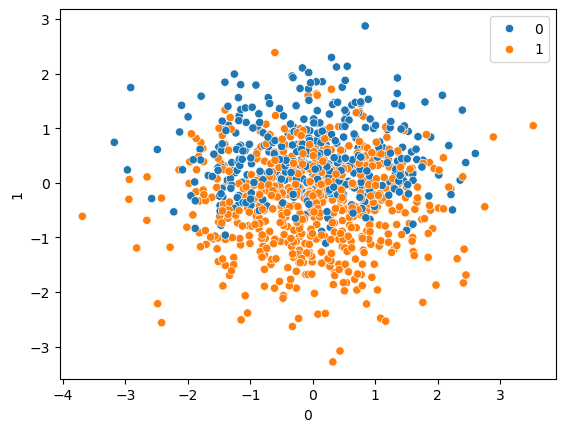

In [42]:
import seaborn as sns
sns.scatterplot(x = pd.DataFrame(X)[0],y = pd.DataFrame(X)[1],hue=y)

In [43]:
from collections import Counter
Counter(y)

Counter({1: 600, 0: 400})

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_preds = logistic.predict(X_test)

In [47]:
y_preds_probability = logistic.predict_proba(X_test)
# y_preds_probability

In [48]:
dummy_model_prob = [0 for _ in range(len(y_test))]
# dummy_model_prob

In [49]:
model_probability = y_preds_probability[:,1]

In [59]:
print("Dummy Model ",roc_auc_score(y_test,dummy_model_prob))
print("Created Model ",roc_auc_score(y_test,model_probability))

Dummy Model  0.5
Created Model  0.9109283196239718


In [72]:
dummy_fpr,dummy_tpr, _ = roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,threshold = roc_curve(y_test,model_probability)

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

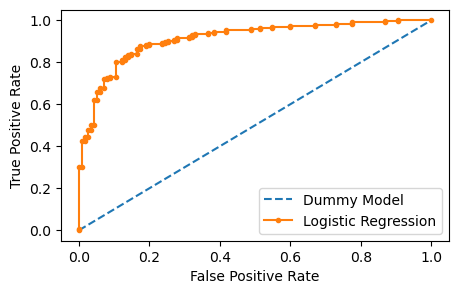

In [74]:
plt.figure(figsize=(5,3))
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label="Dummy Model")
plt.plot(model_fpr,model_tpr,linestyle='solid',marker='.',label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

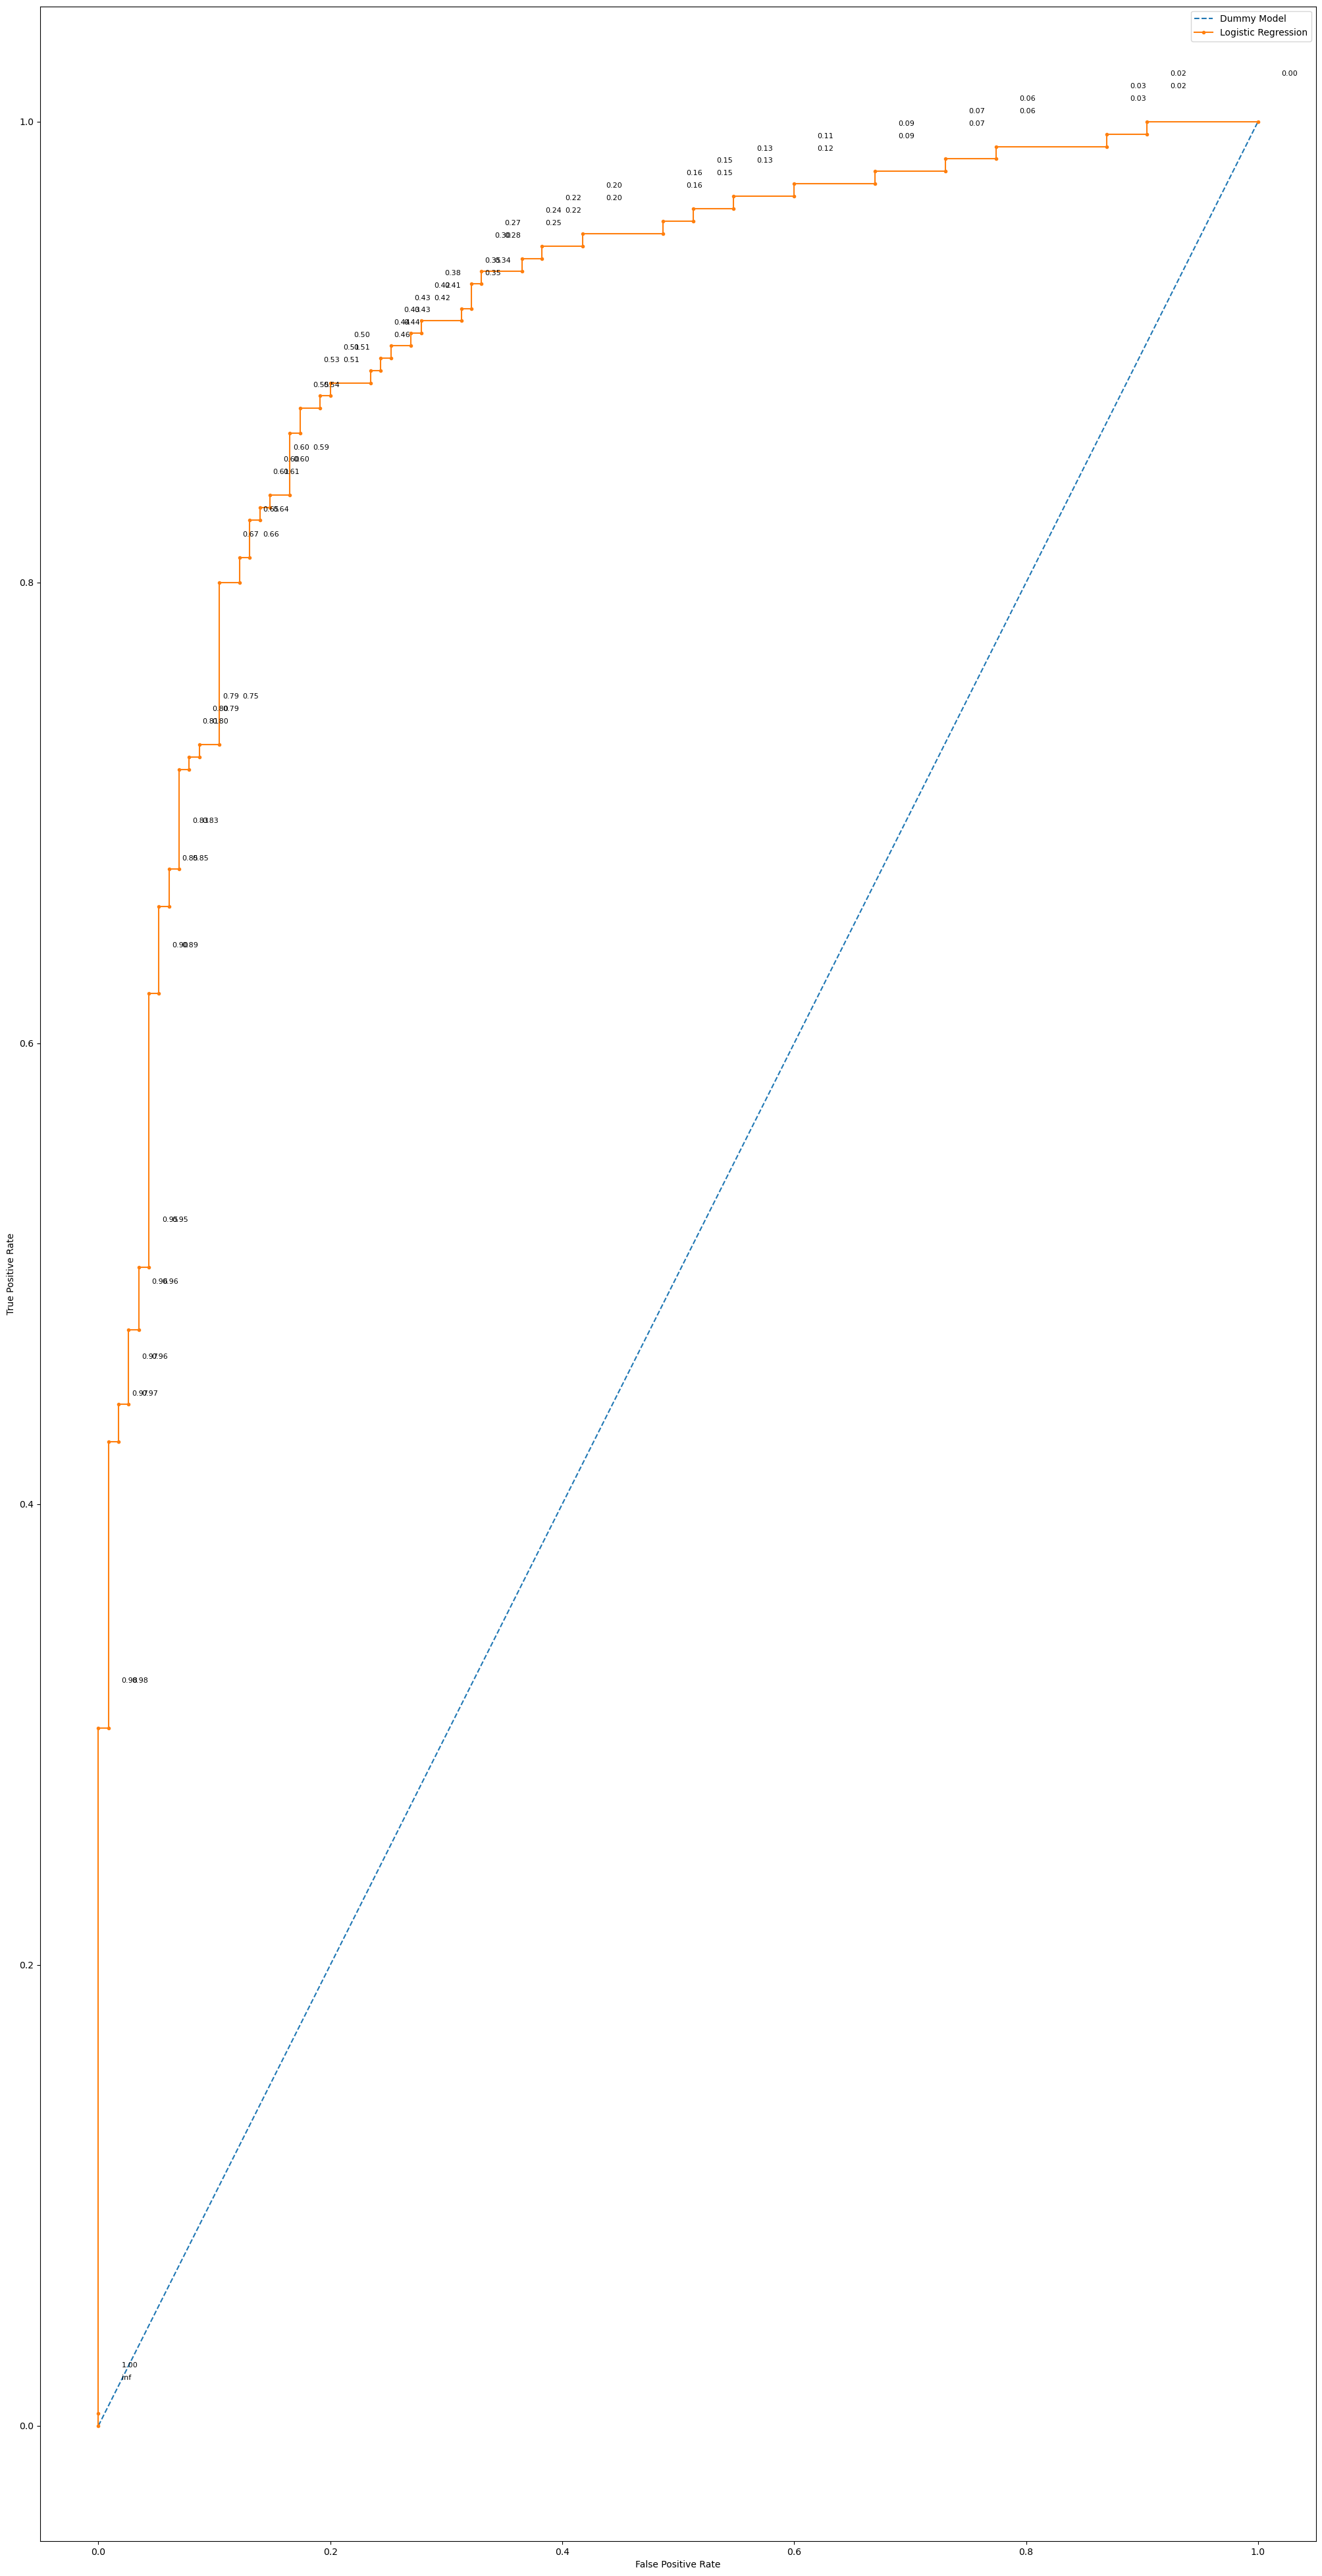

In [87]:
fig, ax =plt.subplots(figsize=(25,50))
ax.plot(dummy_fpr,dummy_tpr,linestyle='--',label="Dummy Model")
ax.plot(model_fpr,model_tpr,linestyle='solid',marker='.',label="Logistic Regression")
for x, y, t in zip(model_fpr, model_tpr, threshold):
    ax.annotate(f'{t:.2f}', xy=(x, y), xytext=(x + 0.02, y + 0.02), fontsize=8)
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
# plt.savefig('roc_curve.png', dpi=800)
plt.show()